## 1. Getting started

2 Data that involve:
1. **Surface points** :Point in space that marked the boundary between two structural element (Think of flag)
2. **Orientation** : Measurement of inclanation of structural element at a certain location in space (any in space but within the structural element)

Defining orientation by:
* Location
* Azimuth
* Dip
* Polarity

In [4]:
# Setup
try:
  import gempy as gp
  import gempy_viewer as gpv
  import pyvista as pv
except:
  print("Its not downloaded yet, downloading now")
  !pip install gempy
  !pip install gempy_viewer
  !pip install pyvista

import gempy as gp
import gempy_viewer as gpv


In [5]:
# Path to input data
data_path = "https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/"
path_to_data = data_path + "/data/input_data/video_tutorials_v3/"

In [6]:
# Create instance of geomodel
geo_model = gp.create_geomodel(
    project_name = 'test_model',
    extent=[0,2500,0,1000,0,1000],
    resolution=[100,40,40],
    importer_helper=gp.data.ImporterHelper(
        path_to_orientations=path_to_data + "tutorial_model_orientations.csv",
        path_to_surface_points =  path_to_data + "tutorial_model_surface_points.csv"
    )
)

SHA256 hash of downloaded file: 7c6d3e04ab03a4b8324d9c91d56c30f9e6a7cb6c22c6f2ee69a5dd001c63337a
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


Surface points hash:  7c6d3e04ab03a4b8324d9c91d56c30f9e6a7cb6c22c6f2ee69a5dd001c63337a


SHA256 hash of downloaded file: 63e42d294dec66b4db2f175bc7b58553ee89d68f3072d36402963c90b0ef5262
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


Orientations hash:  63e42d294dec66b4db2f175bc7b58553ee89d68f3072d36402963c90b0ef5262


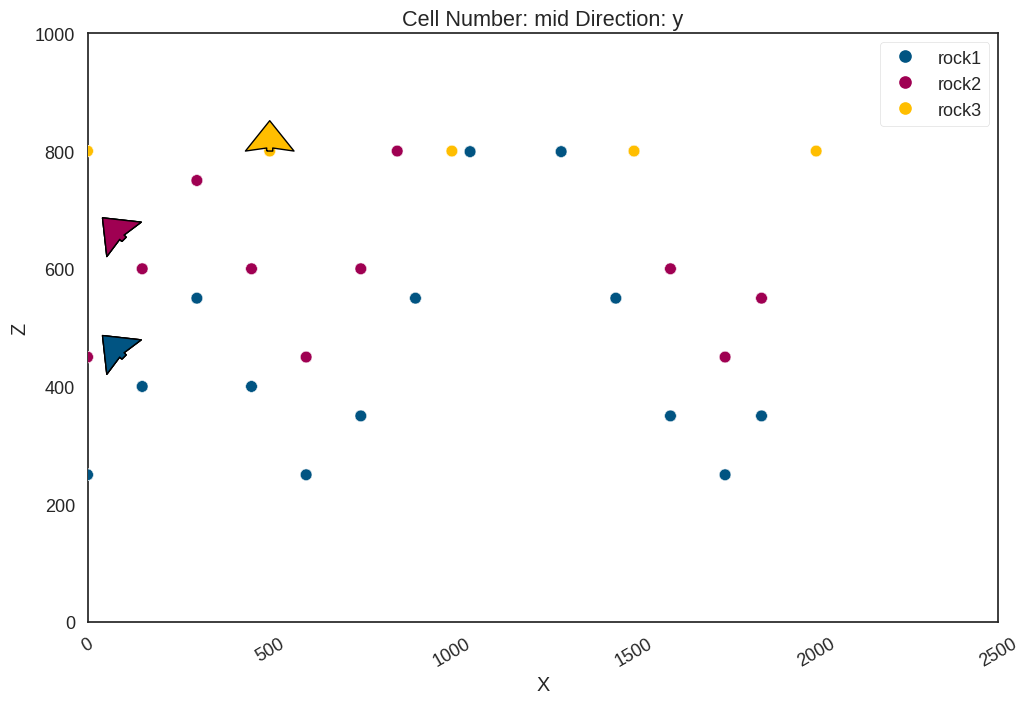

In [7]:
# Display basic cross section of input data
gpv.plot_2d(geo_model)

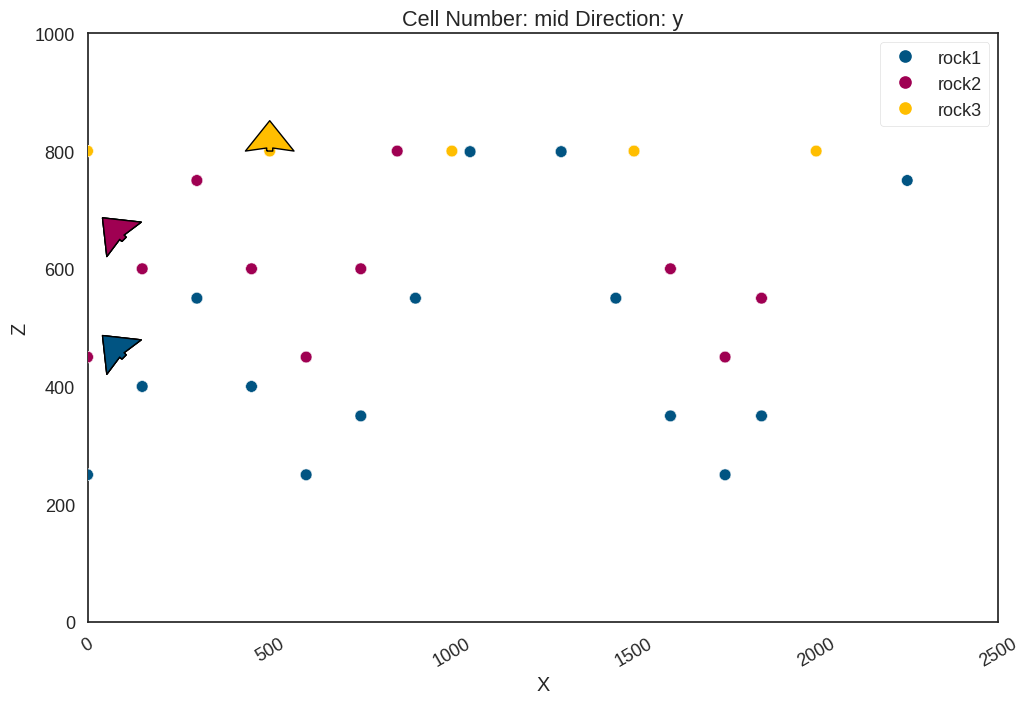

In [8]:
# Manually add a surface point
gp.add_surface_points(
    geo_model = geo_model,
    x = [2250],
    y = [500],
    z = [750],
    elements_names=['rock1']
);

# Show added point
gpv.plot_2d(geo_model)

## 2. Structural Frame

Before compute a structural geological model we need to define geological constraint first


Each structural group have several structural elements with same shape. The order of the structural elements is important. The relation of each elements can be seen to have ERODE for this example but of course there are other type of relation

In [9]:
# View structural frame
geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=default_formation,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=rock1,
	color=#015482,
	is_active=True
),
Element(
	name=rock2,
	color=#9f0052,
	is_active=True
),
Element(
	name=rock3,
	color=#ffbe00,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

In [10]:
# View structural elements
geo_model.structural_frame.structural_elements

[Element(
 	name=rock1,
 	color=#015482,
 	is_active=True
 ),
 Element(
 	name=rock2,
 	color=#9f0052,
 	is_active=True
 ),
 Element(
 	name=rock3,
 	color=#ffbe00,
 	is_active=True
 ),
 Element(
 	name=basement,
 	color=#728f02,
 	is_active=True
 )]

In [11]:
# Define structural groups and age/stratigraphic relationship
# Since the rock1 and rock2 are stacked parallel or semi parallel so it will go together
# While rock3 erode the underlying structural elements, creating unconformity
# making rock 3 have its own section
gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object={
        "Strat_series_2" : ("rock3"),
        "Strat_series_1" : ("rock2", "rock1") # Make sure to place the newer rock first to the oldest or deepest one
    }
)

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Strat_series_2,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=rock3,
	color=#ffbe00,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_series_1,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=rock2,
	color=#9f0052,
	is_active=True
),
Element(
	name=rock1,
	color=#015482,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False],
 [False, False]],

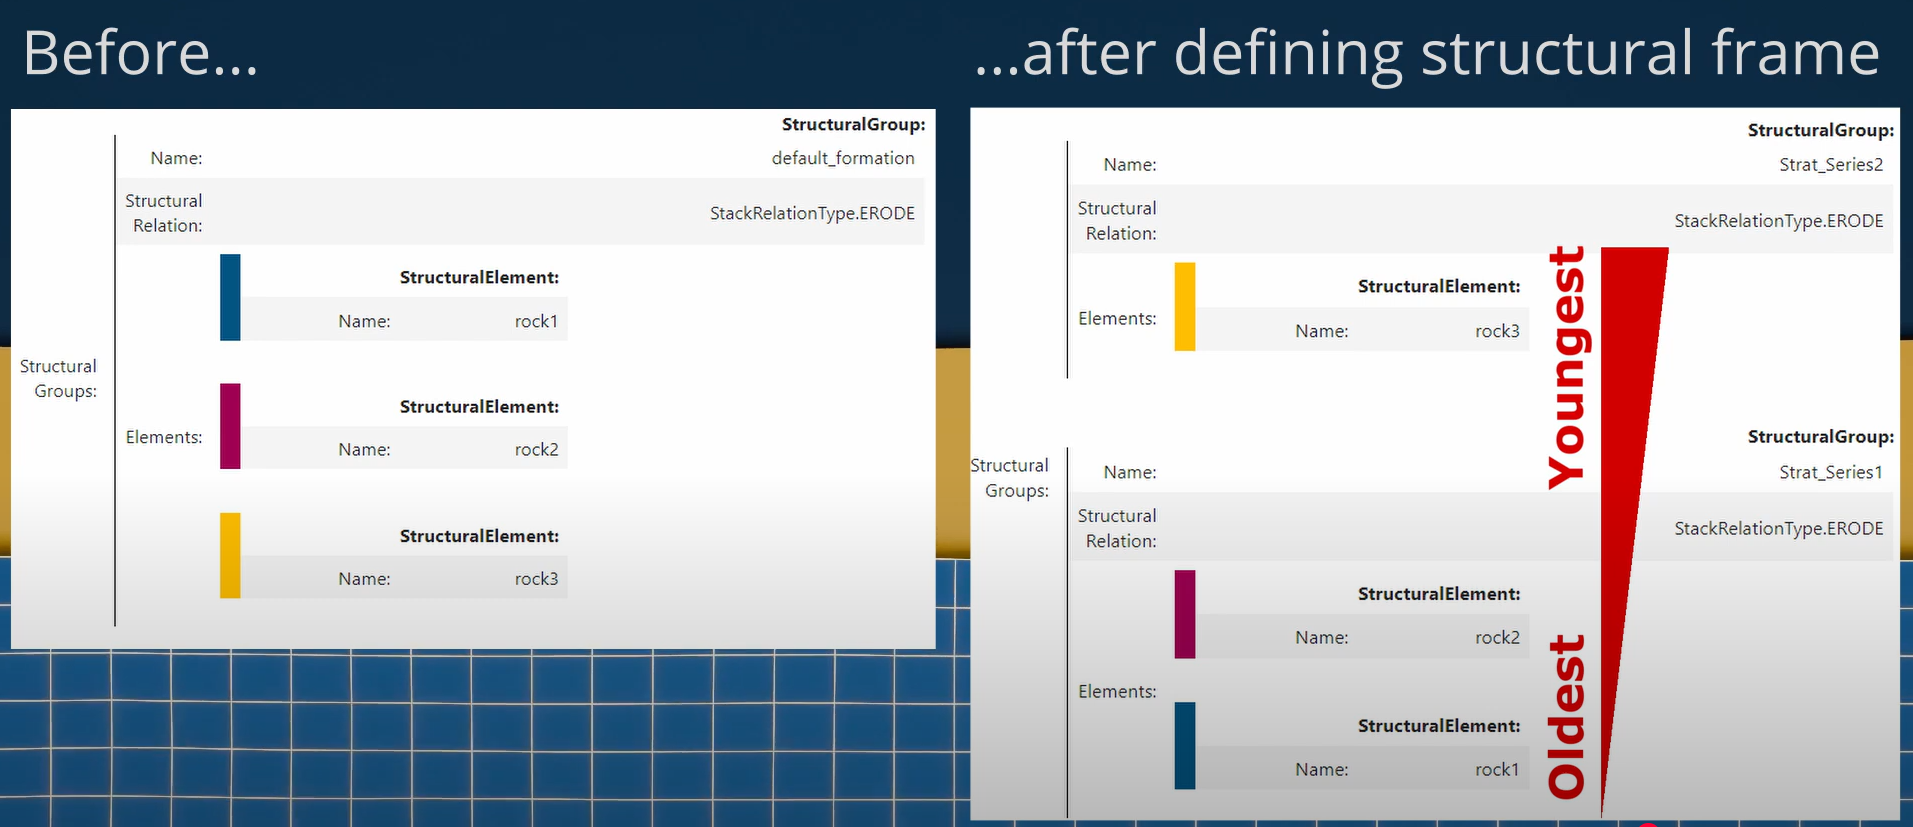

## 3. Compute model

Step for computing model:
1. Create universal CoKriging function for each structural group
2. Evaluate continous Scalarfield based on function at each point and map it
3. Result will be combine based on the relationships defined in the structural frame using masking operations

In [12]:
# View interplolation options
geo_model.interpolation_options

InterpolationOptions(kernel_options=KernelOptions(range=1.7, c_o=10.0, uni_degree=1, i_res=4.0, gi_res=2.0, number_dimensions=3, kernel_function=AvailableKernelFunctions.cubic, kernel_solver=Solvers.DEFAULT, compute_condition_number=False, optimizing_condition_number=False, condition_number=None), evaluation_options=EvaluationOptions(_number_octree_levels=1, _number_octree_levels_surface=4, octree_curvature_threshold=-1.0, octree_error_threshold=1.0, octree_min_level=2, mesh_extraction=True, mesh_extraction_masking_options=<MeshExtractionMaskingOptions.INTERSECT: 3>, mesh_extraction_fancy=True, evaluation_chunk_size=500000, compute_scalar_gradient=False, verbose=False), debug=True, cache_mode=<CacheMode.IN_MEMORY_CACHE: 3>, cache_model_name='test_model', block_solutions_type=<BlockSolutionType.DENSE_GRID: 2>, sigmoid_slope=5000000, debug_water_tight=False)

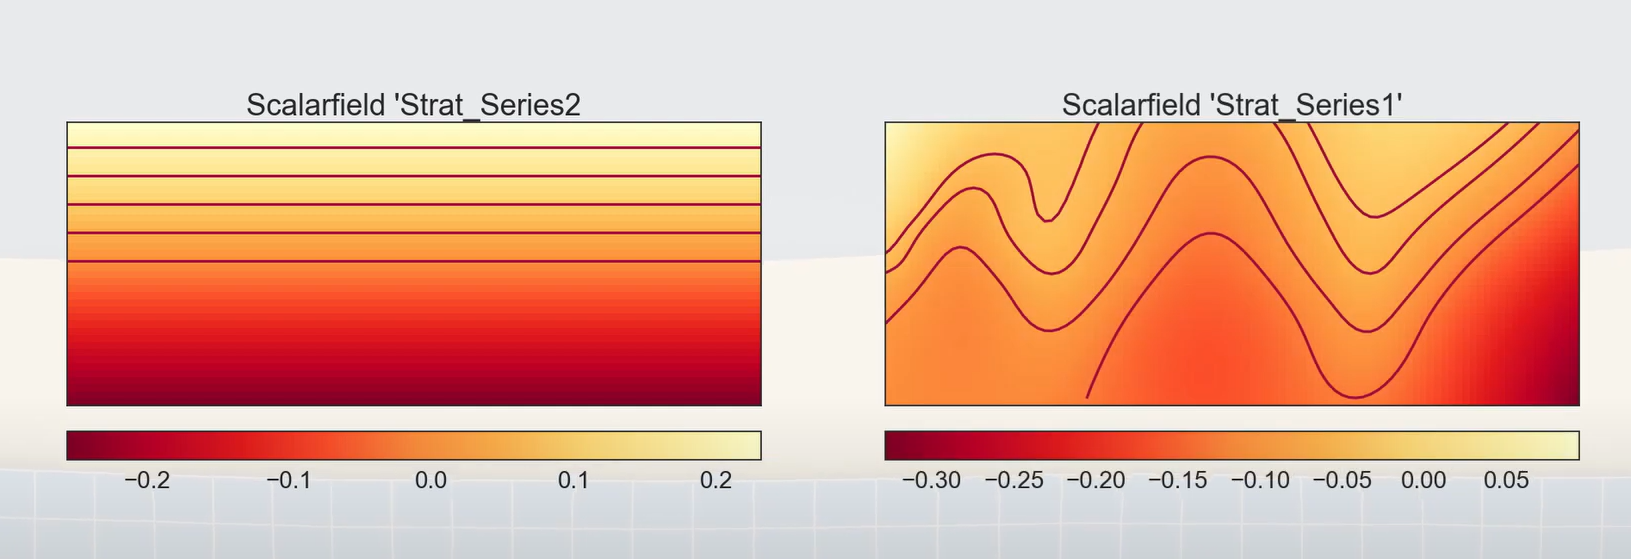

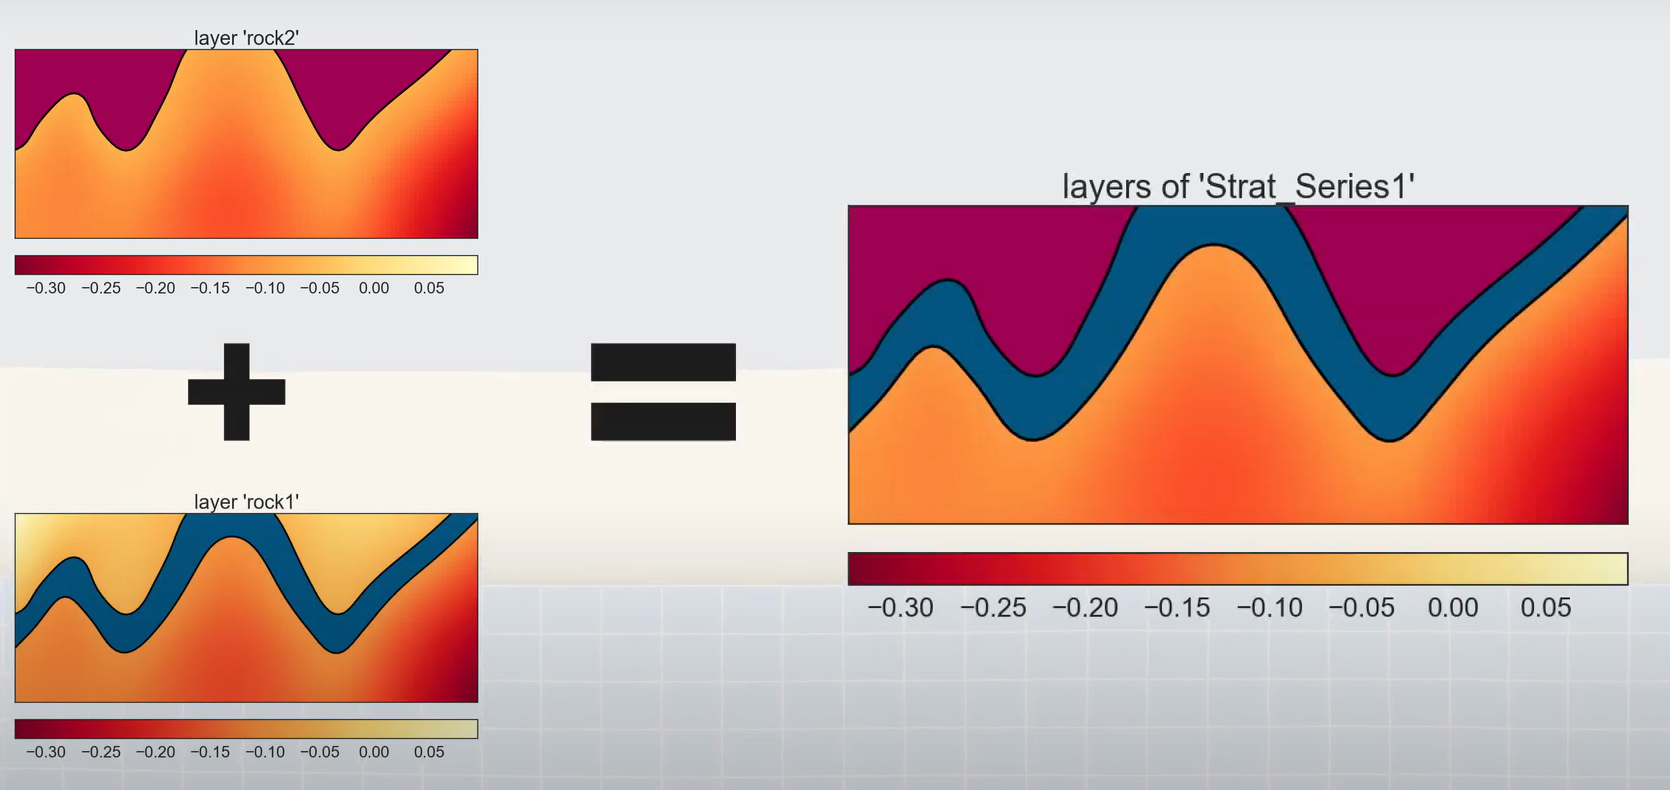

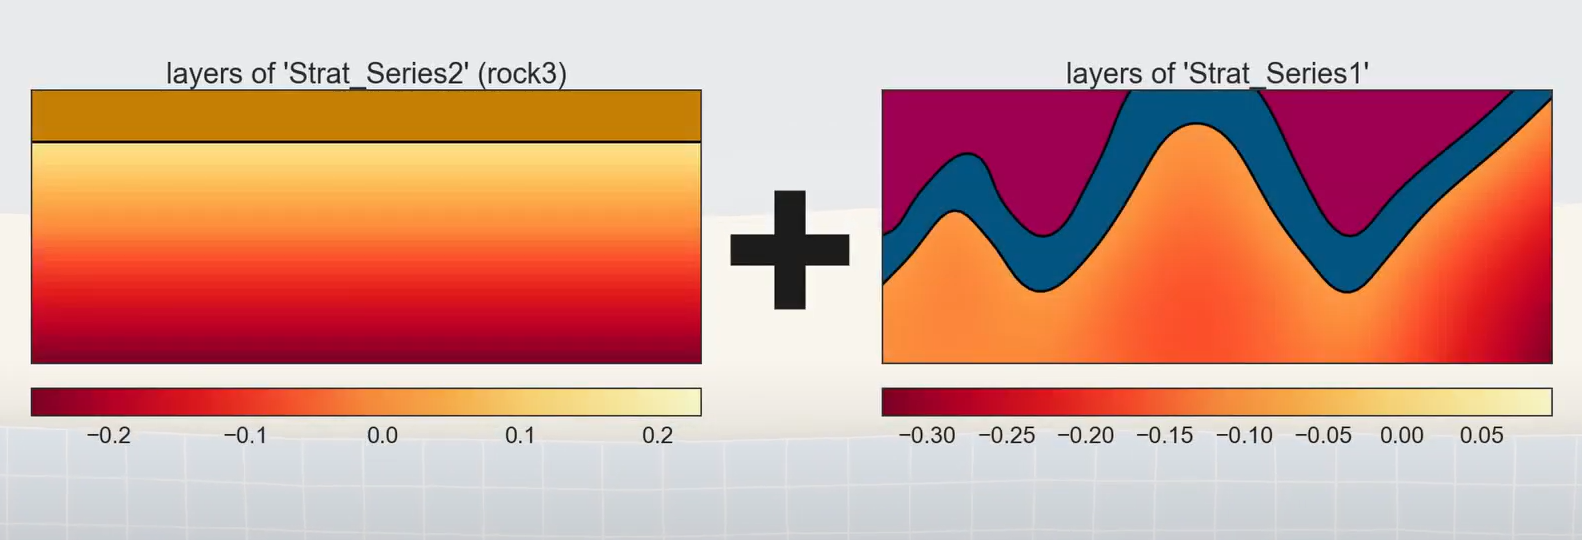

In [13]:
# Compute a solution for the model
gp.compute_model(geo_model)

Setting Backend To: AvailableBackends.numpy
Chunking done: 7 chunks


/usr/local/lib/python3.11/dist-packages/gempy_engine/modules/activator/_soft_segment.py:95: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + bt.t.exp(x))


Chunking done: 30 chunks


/usr/local/lib/python3.11/dist-packages/gempy_engine/modules/activator/_soft_segment.py:95: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + bt.t.exp(x))


Solutions(4 Octree Levels, 3 DualContouringMeshes)

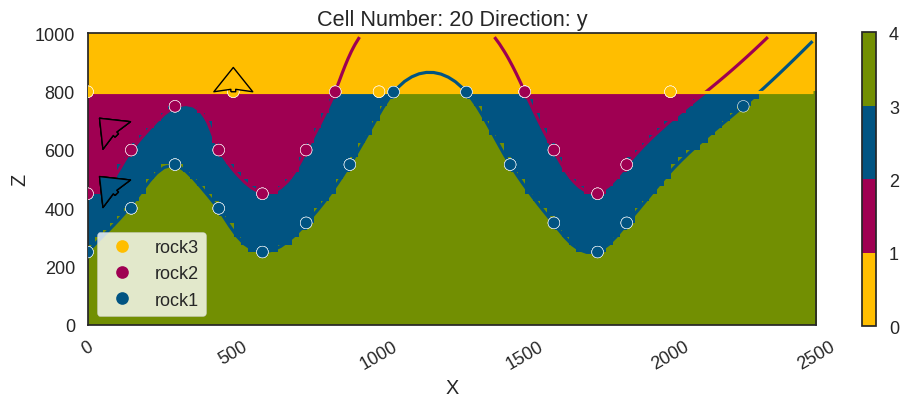

In [14]:
# Display the result in 2d section
gpv.plot_2d(geo_model, cell_number=20)

In [15]:
# Some of example of how to access results
print(f"This is the structural element by ID : {geo_model.solutions.raw_arrays.lith_block}")
print(f"This is the Coordinate of grid points: {geo_model.grid.regular_grid.values}")
print(f"This is the Corresponding scalar fields values for each structural group: {geo_model.solutions.raw_arrays.scalar_field_matrix[1]}")

This is the structural element by ID : [4 4 4 ... 1 1 1]
This is the Coordinate of grid points: [[  12.5   12.5   12.5]
 [  12.5   12.5   37.5]
 [  12.5   12.5   62.5]
 ...
 [2487.5  987.5  937.5]
 [2487.5  987.5  962.5]
 [2487.5  987.5  987.5]]
This is the Corresponding scalar fields values for each structural group: [-0.1160665  -0.11530741 -0.11445189 ... -0.12310825 -0.11725058
 -0.11148229]


## 4. 2D Visualization and cross - section

We can use GPU if needed

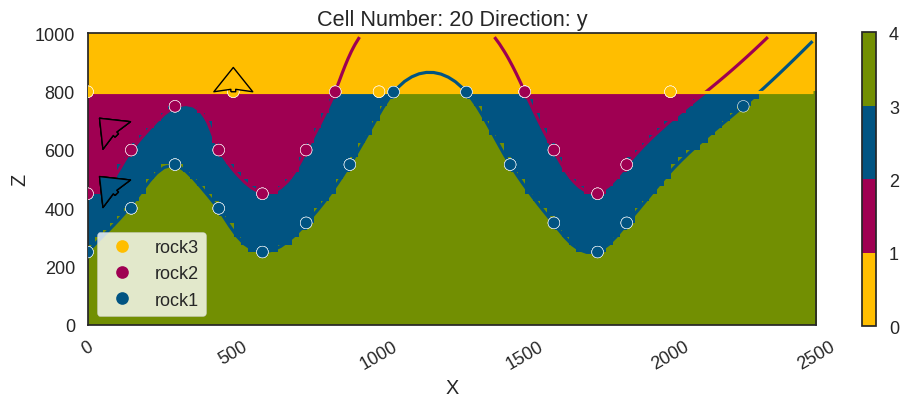

In [16]:
import gempy_viewer as gpv
gpv.plot_2d(geo_model, cell_number=20)

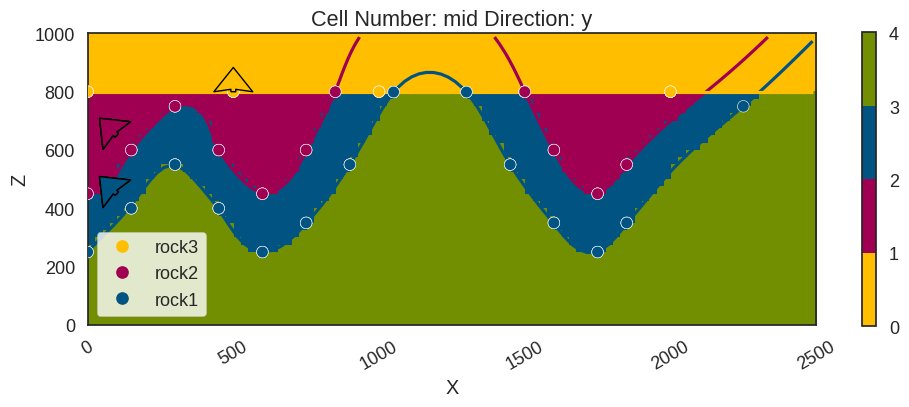

In [17]:
gpv.plot_2d(geo_model, directions = "z")

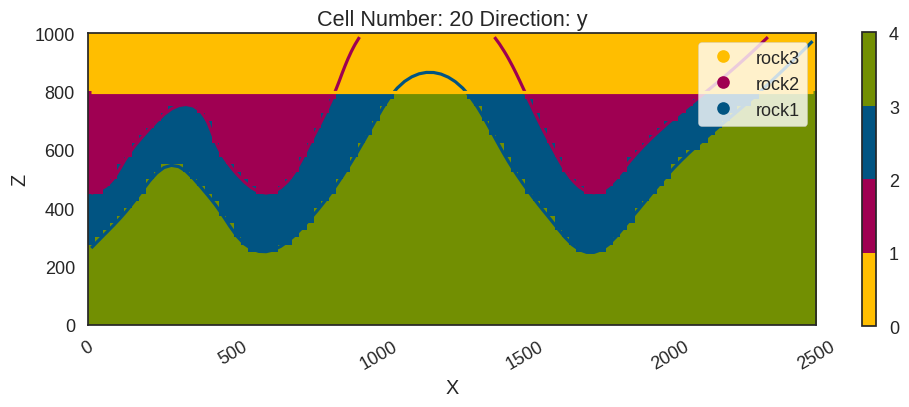

In [18]:
# General plotting arguments
gpv.plot_2d(geo_model, cell_number=20, show_data= False) # Test and read the docstring as much as we want

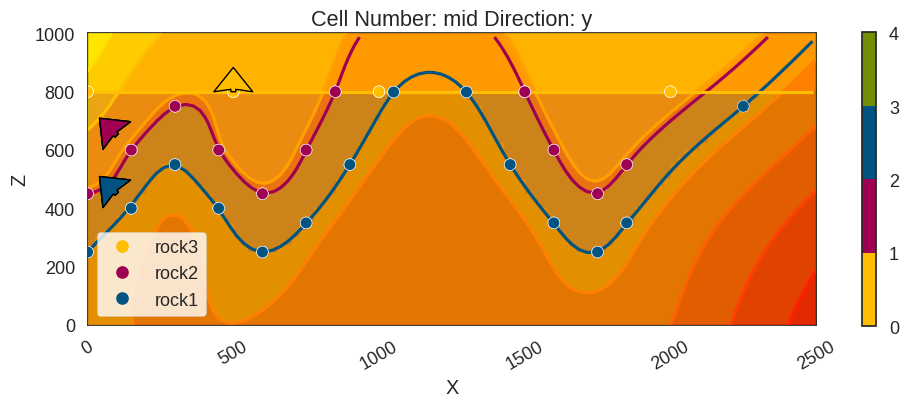

In [19]:
# Plotting arguments for scalarfields
gpv.plot_2d(geo_model, show_scalar =True, series_n=1) # series_n = 0 for newer one, 1 for older one change as needed

If model spans large area but has subtle vertical features, we can use ve argument short for vertical exaggeration to strecth the z-axis and make those features easier to see

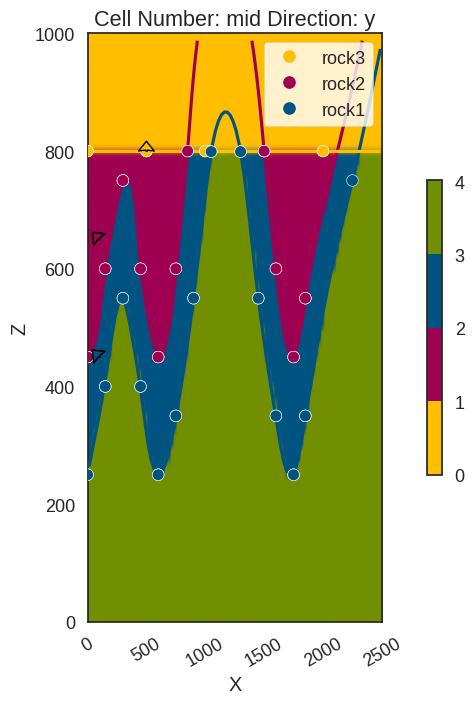

In [20]:
# Use vertical exaggeration
gpv.plot_2d(geo_model, ve=5)

In [21]:
# Create custom section lines
gp.set_section_grid(
    grid= geo_model.grid,
    section_dict= {
        "section1" : ([0,0], [2500,1000], [100,50]),
        "section2" : ([1000,1000], [1500,0], [100,1001])
    }
)

Active grids: GridTypes.DENSE|SECTIONS|NONE


,start,stop,resolution,dist
section1,"[0, 0]","[2500, 1000]","[100, 50]",2692.582404
section2,"[1000, 1000]","[1500, 0]","[100, 1001]",1118.033989


<function gempy_viewer.modules.plot_2d.drawer_traces_2d.plot_section_traces(gempy_model: gempy.core.data.geo_model.GeoModel, ax, section_names: list[str] = None)>

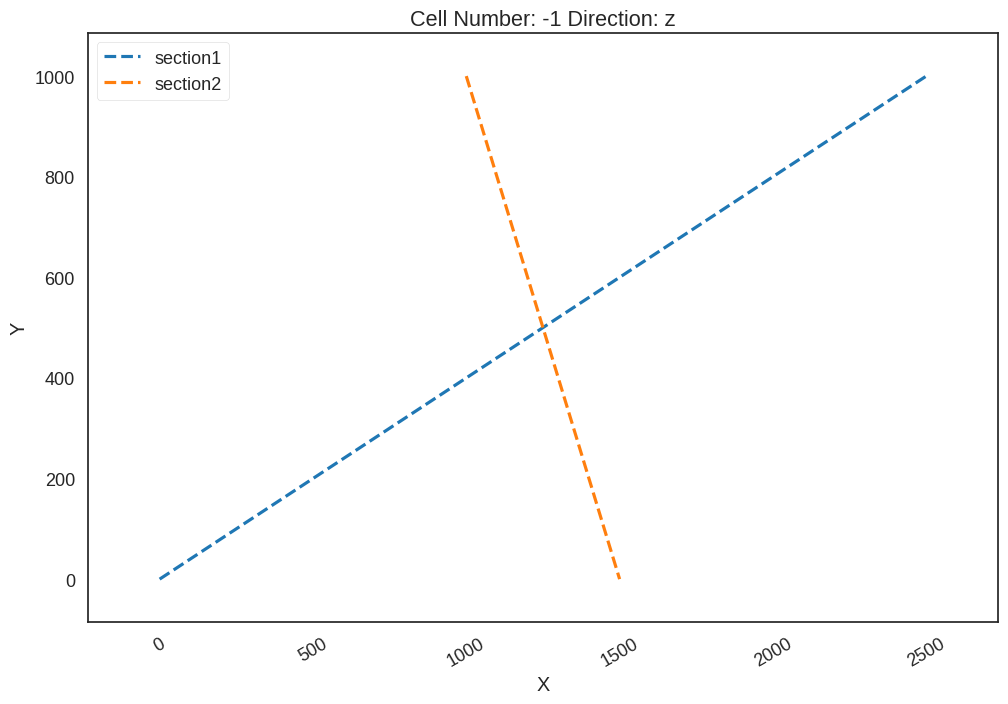

In [22]:
# Show the custom cross section traces
gpv.plot_section_traces(geo_model)

In [23]:
# Recompute the model as a new grid was added!
gp.compute_model(geo_model)

Setting Backend To: AvailableBackends.numpy
Chunking done: 11 chunks


/usr/local/lib/python3.11/dist-packages/gempy_engine/modules/activator/_soft_segment.py:95: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + bt.t.exp(x))


Chunking done: 49 chunks


/usr/local/lib/python3.11/dist-packages/gempy_engine/modules/activator/_soft_segment.py:95: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + bt.t.exp(x))


Solutions(4 Octree Levels, 3 DualContouringMeshes)

/usr/local/lib/python3.11/dist-packages/gempy_viewer/API/_plot_2d_sections_api.py:106: UserWarning: Section contacts not implemented yet. We need to pass scalar field for the sections grid
  warnings.warn(


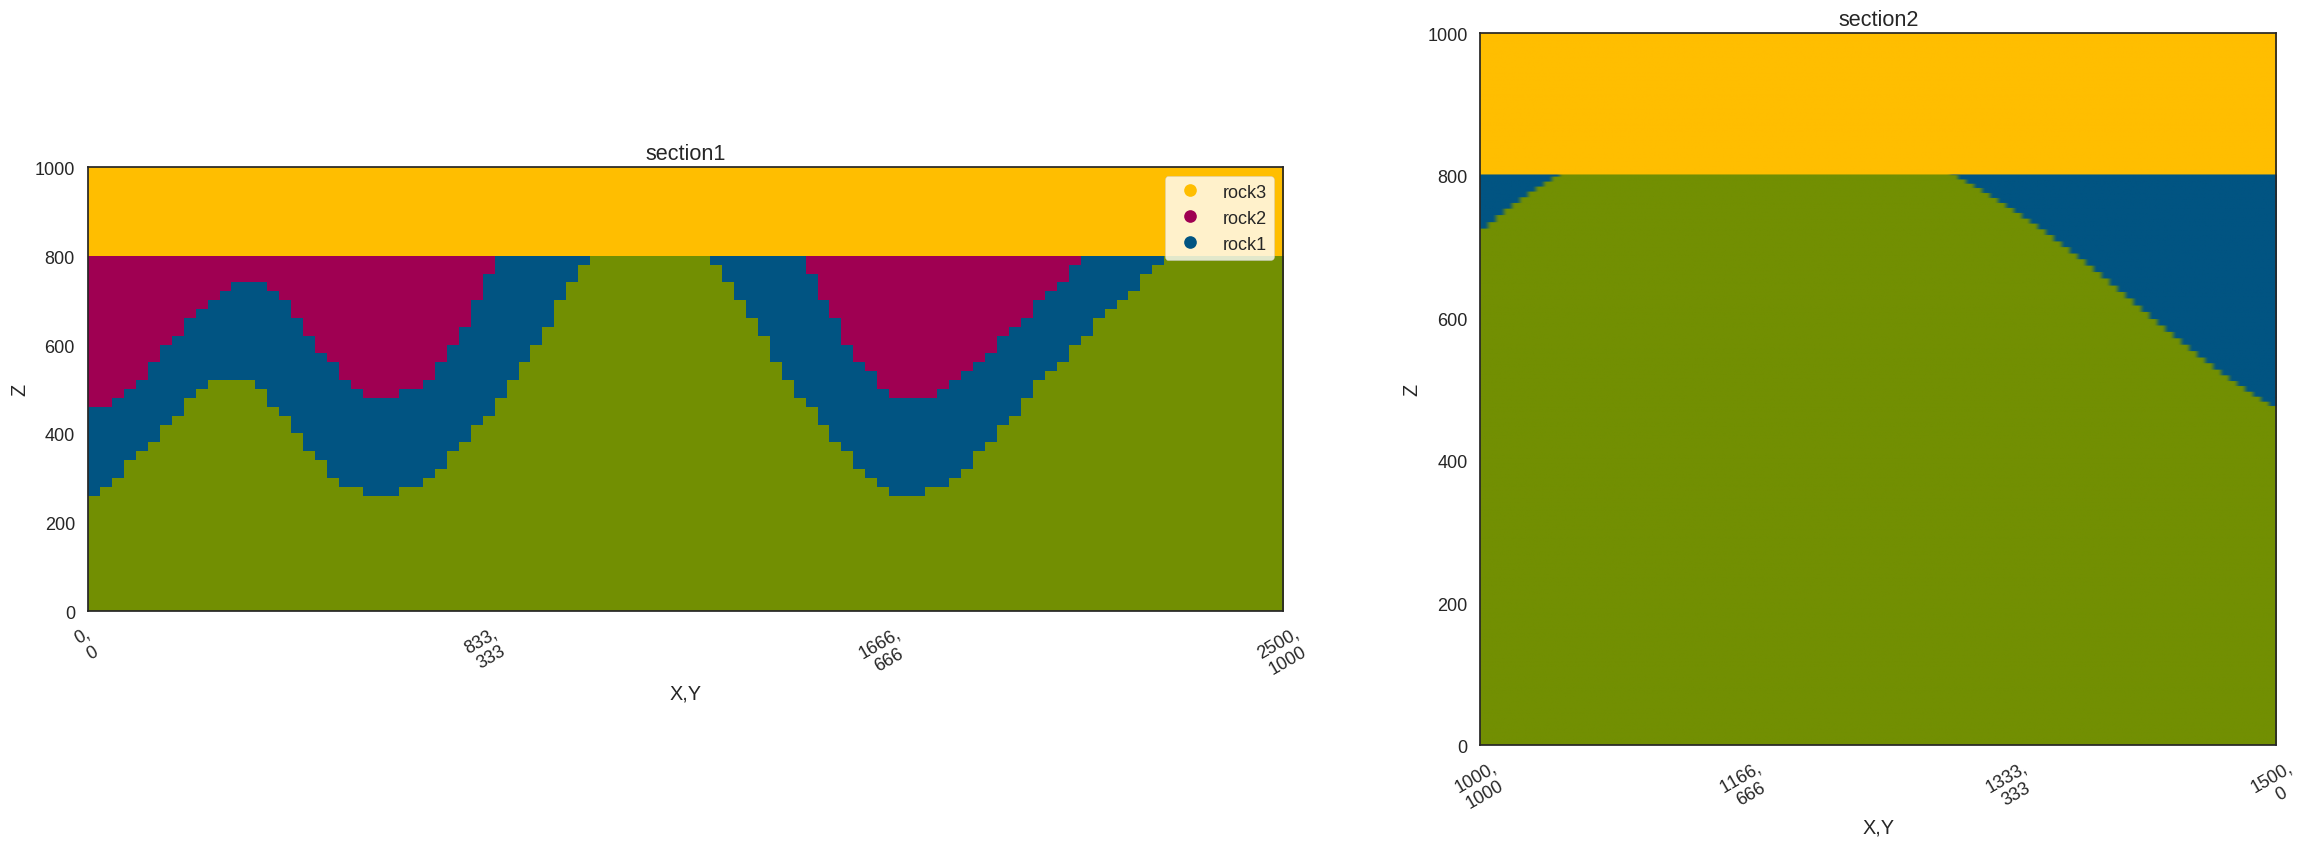

In [24]:
# Display custom cross section
gpv.plot_2d(geo_model, section_names= ['section1', 'section2'], show_data=False)

## 5. 3D visualization & Exporting

In [29]:
# Display the result in 3d
gpv.plot_3d(geo_model, show_lift = False, show_boundaries = True)


/usr/local/lib/python3.11/dist-packages/gempy_viewer/modules/plot_3d/drawer_surfaces_3d.py:38: PyVistaDeprecationWarning: 
../usr/local/lib/python3.11/dist-packages/gempy_viewer/modules/plot_3d/drawer_surfaces_3d.py:38: Argument 'color' must be passed as a keyword argument to function 'BasePlotter.add_mesh'.
From version 0.50, passing this as a positional argument will result in a TypeError.
  gempy_vista.surface_actors[element.name] = gempy_vista.p.add_mesh(


In [30]:
# create and add pyvista objects
arrow = pv.Arrow(start = [2600,0,1000], direction=[0,1,0], scale = 300)

# Do not show plotter yet
plotter = gpv.plot_3d(geo_model, show = False)

plotter.p.add_mesh(arrow)
plotter.p.show()

/usr/local/lib/python3.11/dist-packages/gempy_viewer/modules/plot_3d/drawer_surfaces_3d.py:38: PyVistaDeprecationWarning: 
../usr/local/lib/python3.11/dist-packages/gempy_viewer/modules/plot_3d/drawer_surfaces_3d.py:38: Argument 'color' must be passed as a keyword argument to function 'BasePlotter.add_mesh'.
From version 0.50, passing this as a positional argument will result in a TypeError.
  gempy_vista.surface_actors[element.name] = gempy_vista.p.add_mesh(


In [31]:
# How to access DC meshes
geo_model.solutions.dc_meshes[1].dc_data # index 0 is youngest boundary on 2 is the oldest

# Transform mesh vertecies to original coordinate system
back_transformed_vertecies = geo_model.input_transform.apply_inverse(geo_model.solutions.dc_meshes[0].vertices)
back_transformed_vertecies

array([[  78.129     ,   31.254     ,  799.99999996],
       [  78.129     ,   93.754     ,  799.99999996],
       [ 234.379     ,   31.254     ,  799.99999996],
       [ 234.379     ,   93.754     ,  799.99999996],
       [  78.129     ,  156.254     ,  799.99999996],
       [  78.129     ,  218.754     ,  799.99999996],
       [ 234.379     ,  156.254     ,  799.99999996],
       [ 234.379     ,  218.754     ,  799.99999996],
       [ 390.629     ,   31.254     ,  799.99999996],
       [ 390.629     ,   93.754     ,  799.99999996],
       [ 546.879     ,   31.254     ,  799.99999996],
       [ 546.879     ,   93.754     ,  799.99999996],
       [ 390.629     ,  156.254     ,  799.99999996],
       [ 390.629     ,  218.754     ,  799.99999996],
       [ 546.879     ,  156.254     ,  799.99999996],
       [ 546.879     ,  218.754     ,  799.99999996],
       [  78.129     ,  281.254     ,  799.99999996],
       [  78.129     ,  343.754     ,  799.99999996],
       [ 234.379     ,  281.

In [32]:
# To export use this
plotter = gpv.plot_3d(geo_model, show = False)
plotter.p.export_obj("export/gempy_scene.obj")
plotter.p.export_gltf("export/gempy_scene.gltf")
plotter.p.show

/usr/local/lib/python3.11/dist-packages/gempy_viewer/modules/plot_3d/drawer_surfaces_3d.py:38: PyVistaDeprecationWarning: 
../usr/local/lib/python3.11/dist-packages/gempy_viewer/modules/plot_3d/drawer_surfaces_3d.py:38: Argument 'color' must be passed as a keyword argument to function 'BasePlotter.add_mesh'.
From version 0.50, passing this as a positional argument will result in a TypeError.
  gempy_vista.surface_actors[element.name] = gempy_vista.p.add_mesh(
ERROR:root:unable to open /content/export/gempy_scene.obj
/usr/local/lib/python3.11/dist-packages/pyvista/plotting/plotter.py:872: UserWarning: Plotter contains non-PolyData datasets. These have been overwritten with PolyData surfaces and are internally copies of the original datasets.
  warnings.warn(
ERROR:root:Unable to open file for gltf output.


<bound method Plotter.show of <pyvista.plotting.plotter.Plotter object at 0x79c969e90fd0>>

## 6. Topography